In [1]:
!pip install pycaret
!pip install mlflow
!pip install shap
!pip install zoopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 M

In [97]:
from pycaret.datasets import get_data
df = get_data('energy')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [98]:
df.columns
# Relative Compactness is the ratio of the area of the walls to the area of the walls if they were flat
# Surface Area is the total surface area of the building
# Wall Area is the total wall area of the building
# Roof Area is the total roof area of the building
# Glazing Area is the area of the windows in the building



Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [99]:
from pycaret.regression import *


In [100]:
energy_reg1 = setup(df,
                    ignore_features = ['Heating Load'],
                    target = 'Cooling Load',
                    session_id=2024,
                    log_experiment=False,
                    experiment_name='energy_regression1')

,Description,Value
0,Session id,2024
1,Target,Cooling Load
2,Target type,Regression
3,Original data shape,"(768, 10)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Ignore features,1
8,Numeric features,8
9,Preprocess,True


In [6]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6389,1.1489,1.0491,0.9870,0.0334,0.0238,0.1440
lightgbm,Light Gradient Boosting Machine,0.8873,1.7100,1.3070,0.9807,0.0413,0.0328,0.3380
gbr,Gradient Boosting Regressor,1.0391,2.3767,1.5382,0.9734,0.0472,0.0375,0.1700
rf,Random Forest Regressor,1.0569,3.0333,1.7351,0.9661,0.0527,0.0369,0.2120
et,Extra Trees Regressor,1.0586,3.4956,1.8625,0.9608,0.0561,0.0367,0.2140
dt,Decision Tree Regressor,1.1719,4.3431,2.0757,0.9514,0.0641,0.0417,0.0280
knn,K Neighbors Regressor,1.6732,4.8552,2.1883,0.9454,0.0835,0.0699,0.0380
ada,AdaBoost Regressor,1.7986,5.6480,2.3697,0.9366,0.0805,0.0697,0.0880
lr,Linear Regression,2.2554,10.0908,3.1656,0.8867,0.1111,0.0905,2.4320
br,Bayesian Ridge,2.2873,10.2643,3.1924,0.8849,0.1141,0.0939,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [14]:
model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5717,0.6607,0.8128,0.9935,0.0260,0.0208
1,0.4672,0.4311,0.6566,0.9949,0.0231,0.0184
2,0.7359,1.9448,1.3946,0.9759,0.0420,0.0272
3,0.4927,0.4909,0.7006,0.9931,0.0240,0.0189
4,0.7712,2.2455,1.4985,0.9784,0.0402,0.0254
5,0.4773,0.5715,0.7560,0.9933,0.0256,0.0191
6,0.6353,0.7986,0.8936,0.9897,0.0314,0.0245
7,0.7764,1.9709,1.4039,0.9804,0.0398,0.0271
8,0.4646,0.4741,0.6886,0.9950,0.0253,0.0196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

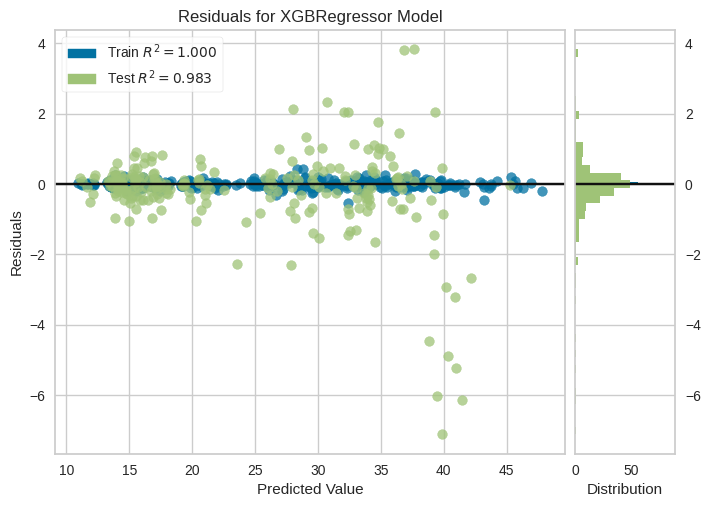

In [15]:
plot_model(model)

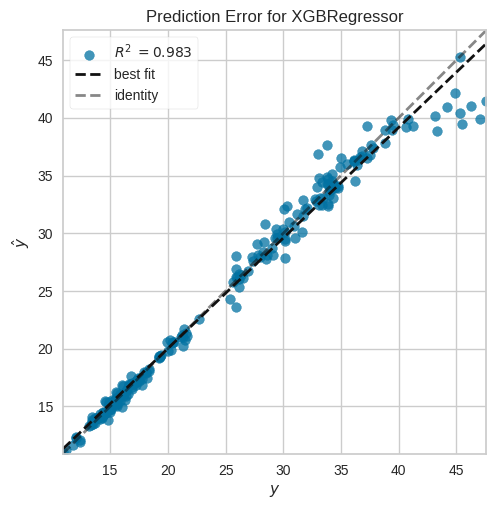

In [16]:
plot_model(model, plot="error")

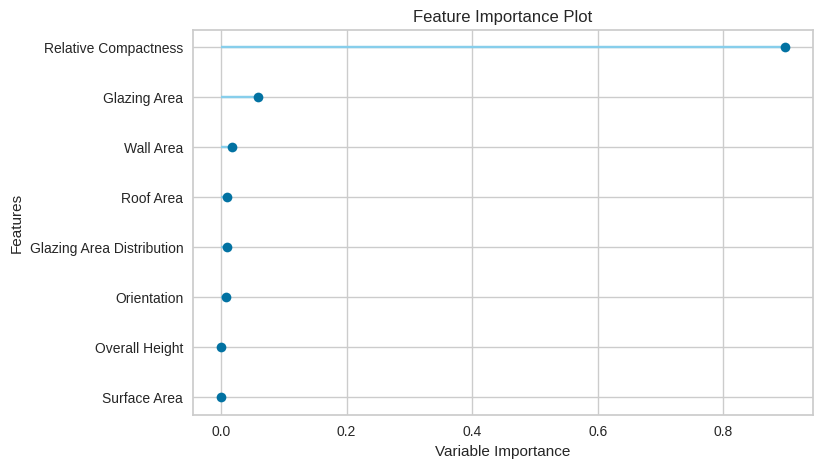

In [17]:
plot_model(model, plot = 'feature')

In [18]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
pred_holdouts = predict_model(model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.6556,1.5229,1.2341,0.9834,0.0344,0.0231


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load,prediction_label
286,0.62,808.5,367.5,220.50,3.5,4,0.10,5,13.990000,14.000792
710,0.66,759.5,318.5,220.50,3.5,4,0.40,4,18.360001,18.231325
13,0.82,612.5,318.5,147.00,7.0,3,0.00,0,21.459999,20.713896
296,0.86,588.0,294.0,147.00,7.0,2,0.25,1,33.980000,33.292915
290,0.98,514.5,294.0,110.25,7.0,4,0.25,1,29.280001,29.573301


In [126]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Define constant data point
data_point = {
    "Surface Area": 800, "Wall Area": 350, "Roof Area": 200, "Overall Height": 4,
    "Orientation": 2, "Glazing Area": 0.1, "Glazing Area Distribution": 1
}

# Generate the ranges
relative_compactness = np.arange(0.01, 1.01, 0.02)
glazing_area = np.arange(0.01, 1.01, 0.02)

# Use product to create combinations
combinations = [
    {**data_point, "Relative Compactness": r, "Glazing Area": g}
    for r, g in product(relative_compactness, glazing_area)
]

# Create DataFrame directly
data = pd.DataFrame(combinations)

# Assume 'predict_model' and 'model' are defined
pred = predict_model(model, data=data)
# pred.head()

# Prepare data for surface plot
X, Y = np.meshgrid(glazing_area, relative_compactness)
Z = griddata((data['Glazing Area'], data['Relative Compactness']), pred['prediction_label'], (X, Y), method='cubic')

# Plotting
fig = go.Figure(data=[go.Surface(z=Z, x=X[0], y=Y[:, 0], colorscale='jet')])
fig.update_layout(title='Predicted Cooling Load', autosize=True,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(
                      xaxis_title='Glazing Area',
                      yaxis_title='Relative Compactness',
                      zaxis_title='Prediction Label'
                  ))
fig.show()


In [102]:
from zoopt import Dimension, ValueType, Dimension2, Objective, Parameter, Opt, ExpOpt
import numpy as np
import pandas as pd

# Define dimensionality of the problem
dim_size = 2
dim = Dimension(dim_size, [[0, 1]]*dim_size, [True]*dim_size)

def get_prediction(r, g, model):
  data_point = {
        "Surface Area": 800,
        "Relative Compactness": r,
        "Glazing Area": g,
        "Wall Area": 350,
        "Roof Area": 200,
        "Overall Height": 4,
        "Orientation": 2,
        "Glazing Area Distribution": 1
    }
  data_df = pd.DataFrame([data_point])
  predicted_cooling_load = predict_model(model, data=data_df)
  out = predicted_cooling_load.iloc[0]['prediction_label']
  return out



In [155]:
best_val = 999999

def objective_function(solution):
    global best_val
    x = solution.get_x()
    obj_val = get_prediction(x[0], x[1], model)
    if obj_val <= best_val:
      with open("optimization_results.txt", "a") as file:
          file.write(f"{x[0]}, {x[1]}, {obj_val}\n")
          best_val = obj_val
    return obj_val

# Define the Objective
obj = Objective(func=objective_function, dim=dim)

param = Parameter(budget=1000,
                  time_budget=60,
                  intermediate_result=True,
                  intermediate_freq=20,
                  exploration_rate=0.05,
                  seed=2024)


solution = Opt.min(obj, param)


[zoopt] expected remaining running time: 00:01:00


[zoopt] budget 20, fx result: 12.207902908325195
[zoopt] x: [0.18815196003850598, 0.0549085168991037]


[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [0.18815196003850598, 0.0854590784460563]
[zoopt] value: 12.207902908325195


[0.18815196003850598, 0.0854590784460563] 12.207902908325195


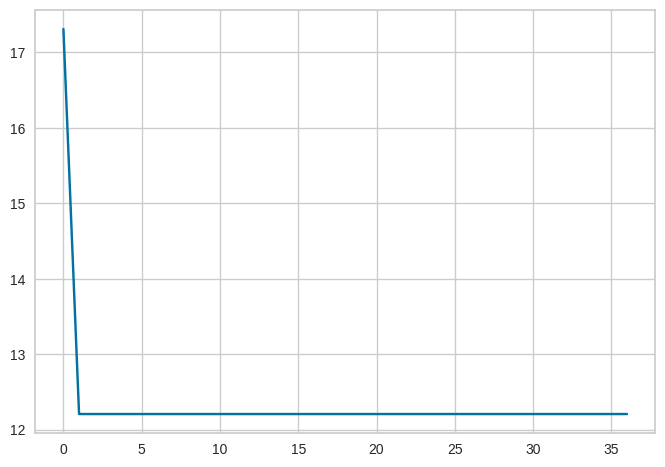

In [156]:
import matplotlib.pyplot as plt
plt.plot(obj.get_history_bestsofar())
print(solution.get_x(), solution.get_value())



In [157]:
class DummySolution:
    def __init__(self, x):
        self.x = x

    def get_x(self):
        return self.x

test_solution = DummySolution([0.2, 0.9])
objective_function(test_solution)


17.311077117919922

In [161]:
df_opt = pd.read_csv('optimization_results.txt', header=None, names=[
    'Relative Compactness', 'Glazing Area', 'Approximated f(x)'])

fig = go.Figure(data=[go.Surface(z=Z, x=X[0], y=Y[:, 0], colorscale='jet', opacity=0.5)])
fig.add_trace(
    go.Scatter3d(
        x=df_opt['Glazing Area'],
        y=df_opt['Relative Compactness'],
        z=df_opt['Approximated f(x)'],
        mode='lines+markers',
        marker=dict(
            size=5,
            color='black',  # Color of the markers
        ),
        line=dict(width=10,
                  color='black'
        ),
        name='Optimization Points'
    )
)
fig.update_layout(title='Predicted Cooling Load', autosize=True,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(
                      xaxis_title='Glazing Area',
                      yaxis_title='Relative Compactness',
                      zaxis_title='Approximated f(x)'
                  ))
fig.show()

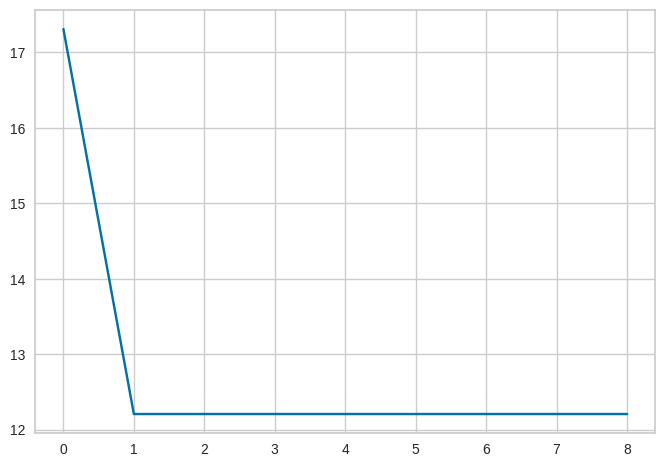

In [159]:
plt.plot(df_opt["Approximated f(x)"])

In [164]:

dim_size = 6
dim = Dimension2(
    [
        (ValueType.CONTINUOUS, [500, 800], 1),
        (ValueType.CONTINUOUS, [0, 1], 0.01),
        (ValueType.CONTINUOUS, [0, 1], 0.01),
        (ValueType.CONTINUOUS, [100, 300], 1),
        (ValueType.CONTINUOUS, [100, 430], 1),
        (ValueType.DISCRETE, [1, 2, 3, 4, 5]),
    ])

def get_prediction(s, c, g, w, r, h, model):
  data_point = {
        "Surface Area": s,
        "Relative Compactness": c,
        "Glazing Area": g,
        "Wall Area": w,
        "Roof Area": r,
        "Overall Height": h,
        "Orientation": 2,
        "Glazing Area Distribution": 1
    }
  data_df = pd.DataFrame([data_point])
  predicted_cooling_load = predict_model(model, data=data_df)
  out = predicted_cooling_load.iloc[0]['prediction_label']
  return out



best_val = 999999
def objective_function(solution):
    global best_val
    x = solution.get_x()
    obj_val = get_prediction(x[0], x[1], x[2], x[3], x[4], x[5], model)
    if obj_val <= best_val:
      best_val = obj_val
      with open("optimization_results_6d.txt", "a") as file:
          file.write(f"{x[0]}, {x[1]}, {x[2]}, {x[3]}, {x[4]}, {x[5]}, {obj_val}\n")

    return obj_val

# Define the Objective
obj = Objective(func=objective_function, dim=dim)
param = Parameter(budget=1000,
                  time_budget=60,
                  intermediate_result=True,
                  intermediate_freq=50,
                  exploration_rate=0.1,
                  seed=2023)

solution = Opt.min(obj, param)



[zoopt] expected remaining running time: 00:01:00


[zoopt] budget 50, fx result: 14.216777801513672
[zoopt] x: [524.0, 0.7, 0.19, 109.0, 348.0, 1]


[zoopt] budget 100, fx result: 14.216777801513672
[zoopt] x: [524.0, 0.7, 0.19, 109.0, 348.0, 1]


[zoopt] budget 150, fx result: 14.216777801513672
[zoopt] x: [524.0, 0.7, 0.19, 109.0, 348.0, 1]


[zoopt] budget 200, fx result: 14.216777801513672
[zoopt] x: [524.0, 0.7, 0.19, 109.0, 348.0, 1]


[zoopt] time_budget runs out
[zoopt] x: [524.0, 0.7, 0.19, 109.0, 348.0, 1]
[zoopt] value: 14.216777801513672


In [169]:
df_opt = pd.read_csv('optimization_results_6d.txt', header=None, names=[
    'Surface Area', 'Relative Compactness', 'Glazing Area',
    'Wall Area', 'Roof Area', 'Overall Height', 'Approximated f(x)'
])

df_opt


,Surface Area,Relative Compactness,Glazing Area,Wall Area,Roof Area,Overall Height,Approximated f(x)
0,597.0,0.89,0.59,125.0,147.0,2,35.861168
1,676.0,0.70,0.19,109.0,168.0,2,14.216778
2,524.0,0.70,0.19,109.0,168.0,2,14.216778
3,524.0,0.70,0.19,109.0,168.0,1,14.216778
4,524.0,0.70,0.19,109.0,390.0,2,14.216778
5,524.0,0.70,0.19,109.0,248.0,2,14.216778
6,524.0,0.70,0.19,109.0,248.0,1,14.216778
7,524.0,0.70,0.19,109.0,229.0,2,14.216778
8,524.0,0.70,0.19,109.0,348.0,2,14.216778
9,524.0,0.70,0.19,109.0,348.0,1,14.216778


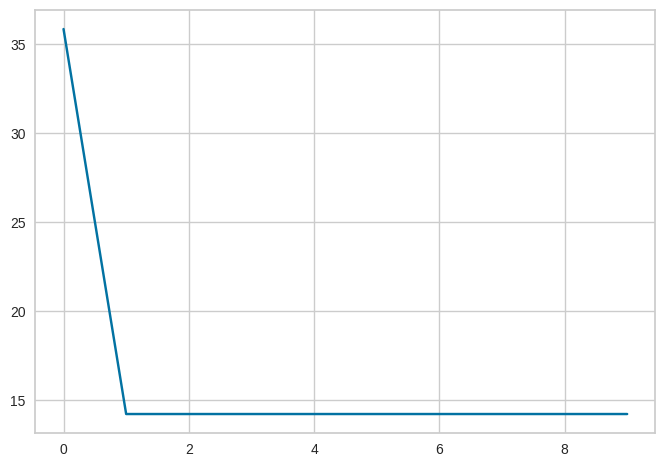

In [170]:
plt.plot(df_opt["Approximated f(x)"])